In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import make_classification

In [2]:
X, y =  make_classification(n_samples = 2000, n_classes = 2,        weights = [1,1], random_state = 1)
                            #no. of rows    # no. of target labels  #For making it balanced dataset                

In [3]:
X.shape

(2000, 20)

In [4]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [6]:
from sklearn.metrics import roc_curve, roc_auc_score

#### Random Forest

In [7]:
##Applying RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train) # predicting the probability 
print(roc_auc_score(y_train, ytrain_pred[:,1]))
ytest_pred = rf_model.predict_proba(X_test)
print(roc_auc_score(y_test, ytest_pred[:,1]))

1.0
0.9823333333333333


#### Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
ytrain_pred = log_model.predict_proba(X_train) # predicting the probability 
print(roc_auc_score(y_train, ytrain_pred[:,1]))
ytest_pred = log_model.predict_proba(X_test)
print(roc_auc_score(y_test, ytest_pred[:,1]))

0.9863568922694498
0.9885777777777777


#### AdaBoost Classifier

In [9]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
ytrain_pred = ada_model.predict_proba(X_train) # predicting the probability 
print(roc_auc_score(y_train, ytrain_pred[:,1]))
ytest_pred = ada_model.predict_proba(X_test)
print(roc_auc_score(y_test, ytest_pred[:,1]))

0.9975081174960356
0.9826111111111111


#### KNN Classifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
ytrain_pred = knn_model.predict_proba(X_train) # predicting the probability 
print(roc_auc_score(y_train, ytrain_pred[:,1]))
ytest_pred = knn_model.predict_proba(X_test)
print(roc_auc_score(y_test, ytest_pred[:,1]))

0.981670071491109
0.9426111111111111


#### Selecting Best Thresold For Maximum Accuracy

In [11]:
pred = []
for model in [rf_model, log_model, ada_model, knn_model]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_pred = pd.concat(pred, axis = 1).mean(axis = 1)
print(roc_auc_score(y_test, final_pred))

0.9847


In [12]:
pd.concat(pred, axis = 1)

,0,1,2,3
0,1.00,0.991861,0.559186,1.0
1,0.02,0.000008,0.463282,0.0
2,0.95,0.966929,0.538202,0.8
3,0.93,0.761539,0.509875,0.8
4,0.59,0.779443,0.490344,0.4
...,...,...,...,...
595,0.02,0.024239,0.461121,0.0
596,0.03,0.000003,0.441377,0.0
597,1.00,0.984385,0.532403,1.0
598,0.00,0.001147,0.441720,0.2


In [13]:
final_pred # mean of models based on each record

0      0.887762
1      0.120823
2      0.813783
3      0.750353
4      0.564947
         ...   
595    0.126340
596    0.117845
597    0.879197
598    0.160717
599    0.834857
Length: 600, dtype: float64

In [14]:
fpr, tpr, thresolds = roc_curve(y_test, final_pred)
thresolds

array([1.91373256, 0.91373256, 0.90674686, 0.90577475, 0.80904168,
       0.8080558 , 0.80430157, 0.80412833, 0.79130736, 0.79071156,
       0.77297465, 0.77287124, 0.73026402, 0.72887362, 0.70499037,
       0.70393711, 0.68038086, 0.67493537, 0.62707293, 0.60675354,
       0.59245356, 0.58800386, 0.58146627, 0.57736186, 0.55088469,
       0.53127948, 0.47700602, 0.47116892, 0.46169266, 0.43794916,
       0.4321034 , 0.37905357, 0.37879719, 0.35840767, 0.35586612,
       0.25697787, 0.24396893, 0.24217239, 0.24140421, 0.21245158,
       0.21098417, 0.12045384, 0.1203351 , 0.10498954])

In [15]:
from sklearn.metrics import accuracy_score
accuracy_list = []
for thresold_value in thresolds:
    y_pred = np.where(final_pred > thresold_value, 1, 0)
    accuracy_list.append(accuracy_score(y_test, y_pred, normalize = True))
accuracy_list = pd.concat([pd.Series(thresolds), pd.Series(accuracy_list)], axis = 1)
accuracy_list.columns = ['Thresolds', 'Accuracy']
accuracy_list.sort_values(by = 'Accuracy', ascending =False, inplace = True)
accuracy_list.head()


,Thresolds,Accuracy
29,0.437949,0.960000
28,0.461693,0.960000
27,0.471169,0.960000
24,0.550885,0.960000
30,0.432103,0.958333


In [16]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, label = 'ROC', color = 'orange')
    plt.plot([0,1], [0,1], linestyle = '--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Roc Curve')
    plt.legend()
    plt.show()
    

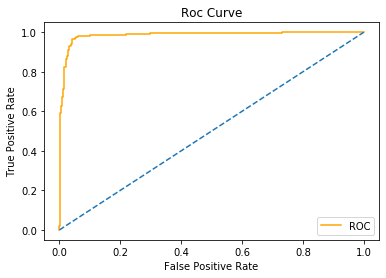

In [17]:
plot_roc_curve(fpr, tpr)